## About Dataset
This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

Age: The insured person's age.

Sex: Gender (male or female) of the insured.

BMI (Body Mass Index): A measure of body fat based on height and weight.

Children: The number of dependents covered.

Smoker: Whether the insured is a smoker (yes or no).

Region: The geographic area of coverage.

Charges: The medical insurance costs incurred by the insured person.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Checking Null Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

> No Null Values

### Let's separate categorical and numerical columns and visualizze each of them 

#### Categorical columns

In [6]:
cat_col = df.select_dtypes(include='O')
cat_col

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


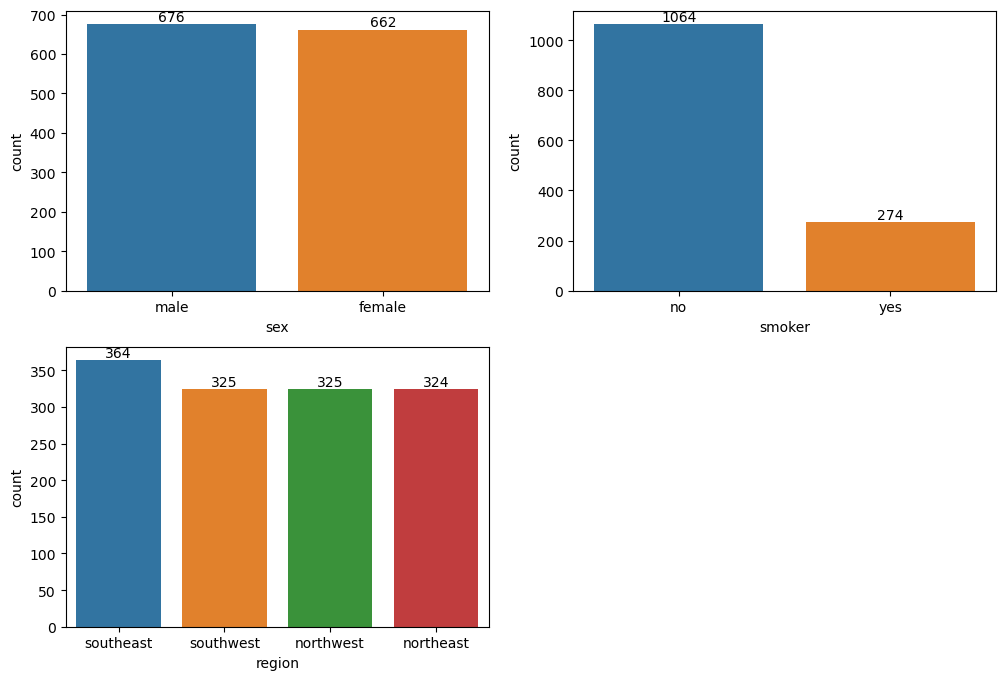

In [11]:
plt.figure(figsize=(12,8))
for i,col in enumerate(cat_col):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index)
    for bars in ax.containers:
        ax.bar_label(bars)

1) In gender graph, we notice that we have balanced number of male and female.

2) In smoker graph, the number of non smokers is much bigger than smokers.

3) In region graph, the is no huge difference between all regions. 

#### Numerical columns

In [13]:
num_col = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_col

['age', 'bmi', 'children', 'charges']

C:\Users\midon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\midon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\midon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

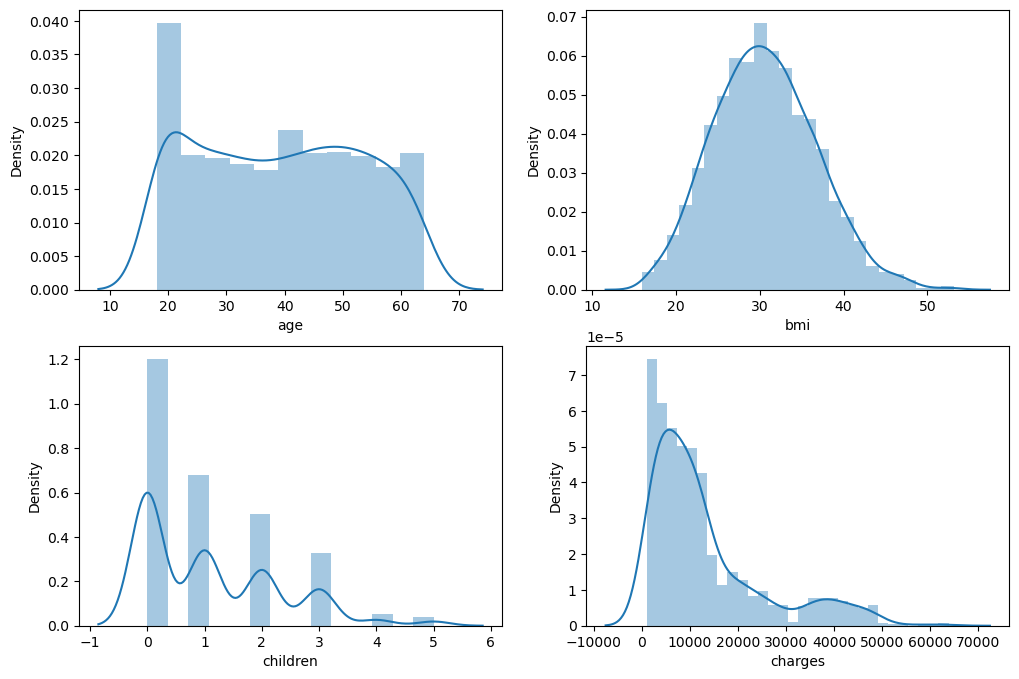

In [19]:
plt.figure(figsize=(12,8))
for i,col in enumerate(num_col):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col],hist=True,kde=True)

In [27]:
['bmi','children','age']

['bmi', 'children', 'age']

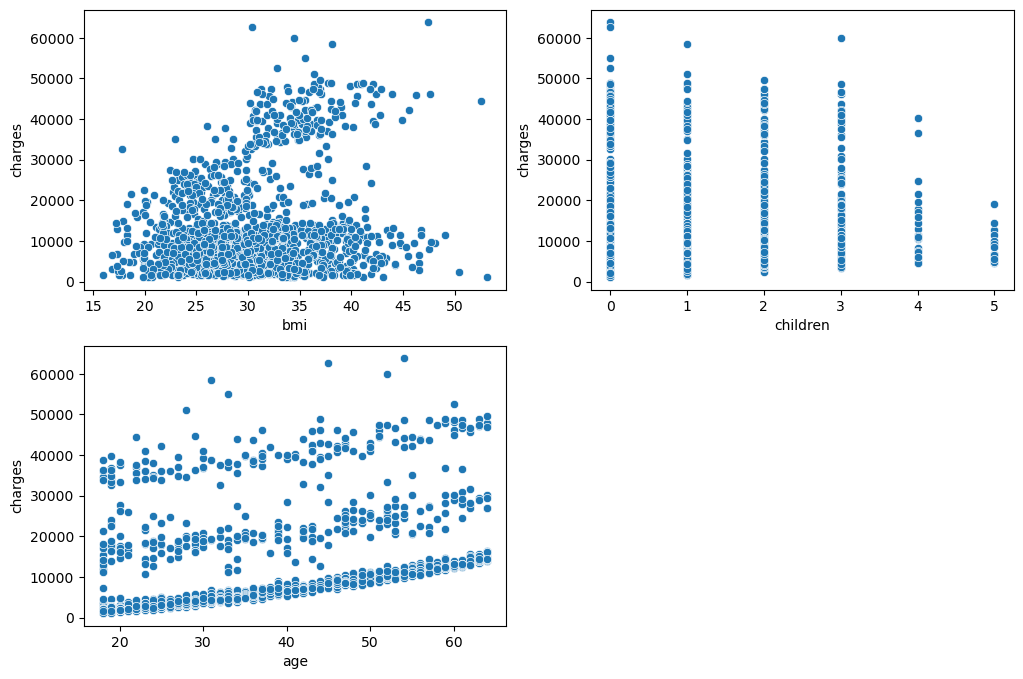

In [29]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['bmi','children','age']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data=df,x=col,y='charges')

1- Older people has to pay premium more than younger people.

2- people with higher bmi has to pay more than people with less bmi.

3- families with higher number of children has to pay less than with small families.

## Feature Engineering

1) We will do label encoding for sex and smoker columns.

2) We will do one hot encoding for region columns.

In [32]:
from sklearn.preprocessing import LabelEncoder
for col in ['sex','smoker']:
    label_enc = LabelEncoder()
    df[col] = label_enc.fit_transform(df[col])

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [36]:
region_df = pd.get_dummies(df['region'],drop_first=True)
region_df.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [37]:
# Let's concatenate region_df with the original df
df_new = pd.concat([df,region_df],axis=1)
df_new.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [38]:
# Drop region column
df_new.drop('region',axis=1,inplace=True)
df_new.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


## Model Building

### Data Spliting

In [42]:
# Splitting the dataset into X (Indipendent features) and y (Dipendent feature)
X = df_new.drop('charges',axis=1)
y = df_new.iloc[:,5]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

we divided the datest into 2 parts:
1) Training part that represent 80% of our data.
2) Test part for evaluate our model, represent 20% of our data. 
    

In [46]:
print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


### Model creation

#### Random forest regressor

we will use random forest regressor with n_estimators = 400 and ,max_depth = 4 randomley selected and also we can use hyperparameter optimization for selecting the best parameters to get best results, but now let's train the model with these two parameters.

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=400,max_depth=4,random_state=42)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [49]:
predictions[:10]

array([10116.65003047,  6105.69770418, 27180.2759833 , 10299.95853392,
       35454.71639139,  6478.05670397,  2806.13015289, 14539.42897231,
        5297.86787639, 11077.37279148])

### Model Evaluation

For evaluation we will use RMSE that stands for Root Mean Squared Error. It is a metric commonly used to evaluate the accuracy of a predictive model, particularly in the context of regression problems. RMSE measures the average magnitude of the errors between predicted values and observed values.

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
MSE = mean_squared_error(y_test,predictions)
MSE

19885354.6930992

In [52]:
RMSE = (MSE)**0.5
RMSE

4459.299798522095

In [56]:
# let's compare the first 10 predictions with the first 10 actual values
compare_df = pd.DataFrame({'Actual_values':np.round(y_test[:10],2),'Predicted_values':np.round(predictions[:10],2)})
compare_df

,Actual_values,Predicted_values
764,9095.07,10116.65
887,5272.18,6105.70
890,29330.98,27180.28
1293,9301.89,10299.96
259,33750.29,35454.72
1312,4536.26,6478.06
899,2117.34,2806.13
752,14210.54,14539.43
1286,3732.63,5297.87
707,10264.44,11077.37
